This code is for Julia whose version is higher than 0.6.x.

# Dynamical Mean Field Theory (DMFT) with the continuous-time auxiliary-field Quantum Monte Carlo solver in the Bethe lattice

We calculate the Green's function with the DMFT in the Bethe lattice. The impurity solver is the continuous-time auxiliary-field Quantum Monte Carlo method (CTAUX).   
The subroutine of the CTAUX is ctaux.jl.  
The subroutine of the DMFT is DMFT.jl.  
To obtain the density of states, we use the numerical analytical continuation with the use of the sparse modeling technique (smac.jl).

The local Green's function in the Bethe lattice is expressed as 
\begin{equation}
G_{\rm loc}(i \omega_n) = \sum_k \frac{1}{i \omega_n -\epsilon_k + \mu - \Sigma(\omega_n)}, 
\end{equation}
\begin{equation}
= \int d\epsilon \frac{\rho_0(\epsilon)}{i \omega_n - \epsilon+\mu - \Sigma(\omega_n)}=K_0(i \omega_n + \mu - \Sigma(\omega_n)),
\end{equation}
Here, 
\begin{equation}
\rho_0(\epsilon) = \frac{2}{\pi D} \sqrt{1 - \left(\frac{\epsilon}{D} \right)^2},
\end{equation}
\begin{equation}
K_0(z) = \frac{2}{D} \left[ \frac{z}{D} - i {\rm sgn}(z'') \sqrt{1- \left(\frac{z}{D} \right)^2} \right],
\end{equation}
$z''$ is an imaginary part of $z$.
The function $K_0(z)$ has the relation: 
\begin{equation}
K_0(z)^{-1} = z - \frac{D^2}{4} K_0(z).
\end{equation}


The bath Green's function is expressed as 
\begin{equation}
{\cal G}(i \omega_n)^{-1} = i \omega_n - E_f - \Delta(\omega_n)
\end{equation}
Here, $\Delta(\omega_n)$ is the hybridization function between the local and bath electrons. 
This Green's function is also expressed as 
\begin{equation}
{\cal G}(i \omega_n)^{-1} = G_f(\omega_n)^{-1} + \Sigma_f(\omega_n)
\end{equation}
In the Bethe lattice, this becomes
\begin{equation}
{\cal G}(i \omega_n) =K_0(i \omega_n + \mu - \Sigma_f(\omega_n))^-1 + \Sigma_f(\omega_n) , 
\end{equation}
\begin{equation}
= i \omega_n + \mu - \Sigma_f(\omega_n) - \frac{D^2}{4}K_0(i \omega_n + \mu - \Sigma_f(\omega_n)) + \Sigma_f(\omega_n),
\end{equation}
\begin{equation}
= i \omega_n + \mu - \frac{D^2}{4}K_0(i \omega_n + \mu - \Sigma_f(\omega_n)).
\end{equation}
Thus, we obtain
\begin{equation}
E_f = - \mu 
\end{equation}
\begin{equation}
\Delta(\omega_n) =  \frac{D^2}{4}K_0(i \omega_n + \mu - \Sigma_f(\omega_n))
\end{equation}


The DMFT calculation in the Bethe lattice is as follows. 
1. $\Sigma_f(\omega_n) = 0$.
2. $G_f(i \omega_n) = G_{\rm loc}(i \omega_n) = \sum_k \frac{1}{i \omega_n -\epsilon_k + \mu - \Sigma_f(\omega_n)} = K_0(i \omega_n + \mu - \Sigma_f(\omega_n))$.
3. The hybridization function is $\Delta(\omega_n) =\frac{D^2}{4}K_0(i \omega_n + \mu - \Sigma_f(\omega_n)) = \frac{D^2}{4} G_f(\omega_n)$.
4. Solve the impurity problem with the hybridization function $\Delta(i \omega_n)$ to obtain the Green's function $G_f(\omega_n)$.
5. Go to 3. until the Green's function $G_f(\omega_n)$ is converged. 

In [1]:
include("./DMFT.jl")
using .dmft

β=30.0 #Inverse temperature
U = 2.0 #Density-Density interaction
μ=U/2 #Chemical potential
K = 1.0
mqs = 300000
ntime = 1024 #number of τs
mfreq = 1024 #number of ωns
norbs = 2 #number of orbitals. norbs = 2 for 1-band model.
V = 1.0 #Strength of the hybridization
nthermal = 1000
mkink = 1024

τmesh,Gτ,Gω,ωmesh,Δ=dmft.dmft_solver(β,U,μ,K,mqs,ntime,mfreq,norbs,V,nthermal,mkink,10,0.3)

println("DMFT loops are done.")

println("The final CTAUX calculation starts.")
mqs = mqs*10
τmesh,Gτ,orderdisp,S,Gω,ωmesh = dmft.ctaux_solver_general(Δ,β,U,μ,K,mqs,ntime,mfreq,norbs,V,nthermal,mkink,false)
println("End.")


-----------------------------------------------------------------
--Dynamical Mean Field Theory for the Bethe lattice            --
--                                                             --
--                      Yuki Nagai, Ph.D 12/15/2017(MM/DD/YY)  --
--       The code works with Julia 0.7.0 08/09/2018(MM/DD/YY)  --
-----------------------------------------------------------------
-----------------------------------------------------------------
DMFT: Initial calculation
------------------------------------------------------
--Continuous-time auxiliary-field Monte Carlo method--
--                       for quantum impurity models--
--                                                  --
--         See, E. Gull et al., EPL 82, 57003 (2008)--
--             Yuki Nagai, Ph.D 10/24/2017(MM/DD/YY)--
------------------------------------------------------
Parameters
Inverse temperature: β = 30.0
Density-Density interaction: U = 2.0
Chemical potential: μ = 1.0
Parameter 'K': K = 1.

done.
8/10: 8-th DMFT loop: error = 0.025324873056817927 + 0.0im
Gτ[1] = 0.4959863715328372 Gτ[ntime] = 0.5210788321157194
------------------------------------------------------
--Continuous-time auxiliary-field Monte Carlo method--
--                       for quantum impurity models--
--                                                  --
--         See, E. Gull et al., EPL 82, 57003 (2008)--
--             Yuki Nagai, Ph.D 10/24/2017(MM/DD/YY)--
------------------------------------------------------
Parameters
Inverse temperature: β = 30.0
Density-Density interaction: U = 2.0
Chemical potential: μ = 1.0
Parameter 'K': K = 1.0
Number of QMC steps: mqs = 300000
Initializing...
done.
γ0= 4.1268741377911216
Thermalizing...
Average sign = 1.0
done.
QMC Start!
 28.874054 seconds (158.62 M allocations: 17.661 GiB, 5.13% gc time)
done!
Calculating Green's function...
done.
9/10: 9-th DMFT loop: error = 0.059420600096850094 + 0.0im
Gτ[1] = 0.369503284896204 Gτ[ntime] = 0.722972029634794
----

In [5]:
using Plots
gr()

Plots.GRBackend()

## The Green's function

┌ Warning: `Array{T}(d::NTuple{N, Int}) where {T, N}` is deprecated, use `Array{T}(undef, d)` instead.
│   caller = plot_color(::Array{RGB{FixedPointNumbers.Normed{UInt8,8}},1}) at colors.jl:24
└ @ PlotUtils /Users/nagai/.julia/packages/PlotUtils/xQ9vp/src/colors.jl:24
┌ Warning: `a::Number + b::AbstractArray` is deprecated, use `a .+ b` instead.
│   caller = get_zvalues(::Int64) at color_utils.jl:104
└ @ PlotUtils /Users/nagai/.julia/packages/PlotUtils/xQ9vp/src/color_utils.jl:104
┌ Warning: The start/next/done iteration protocol is deprecated. Use `iterate` instead.
│   caller = concrete_minimum(::Array{Float64,1}) at Showoff.jl:38
└ @ Showoff /Users/nagai/.julia/packages/Showoff/45n6U/src/Showoff.jl:38
┌ Warning: The start/next/done iteration protocol is deprecated. Use `iterate` instead.
│   caller = concrete_maximum(::Array{Float64,1}) at Showoff.jl:60
└ @ Showoff /Users/nagai/.julia/packages/Showoff/45n6U/src/Showoff.jl:60


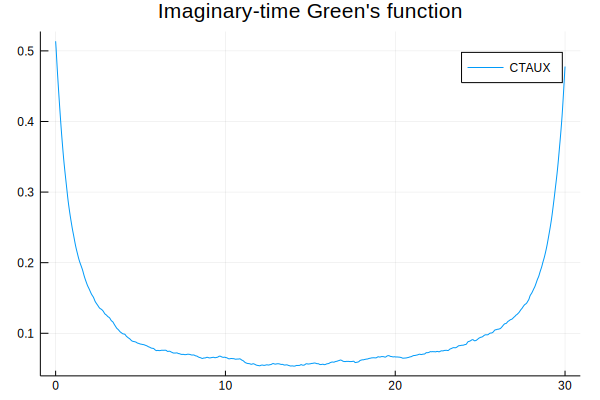

┌ Warning: The start/next/done iteration protocol is deprecated. Implement `iterate(::Plots.SegmentsIterator)`.
│   caller = ip:0x0
└ @ Core :-1


In [6]:
plot(τmesh[:],Gτ[:,1],label="CTAUX",title="Imaginary-time Green's function")

## Numerical analytic continuation
We use the SMAC, the method of the numerical analytic continuation, to obtain the density of states.

In [4]:
include("./smac.jl")
using .Smac
omegamax = 5.0
M = ntime
N = 256
vec_Gout = zeros(Float64,M,1)
xout = zeros(Float64,N,1)

omegas = zeros(Float64,N)
dω = 2omegamax/(N-1)
for i in 1:N
    omegas[i] = (i-1)*dω - omegamax
end


@time (xout,vec_Gout) = Smac.smac_main!(M,N,1,omegamax,β,Gτ)

Making the matrix K...


done.
Doing SVD...
done.
---------------------------------------------
Singular values
1	43.89031875003306
2	38.49375420947391
3	25.710235534593153
4	18.063773311695645
5	11.297535673262026
6	7.055998221685019
7	4.229597177225382
8	2.4895131883905277
9	1.4312473904007679
10	0.8070967345612838
11	0.4464774190571455
12	0.24257513573083875
13	0.1295083182812172
14	0.06798531284030253
15	0.03510520475235
16	0.017838048229154493
17	0.008921936062331708
18	0.0043938491989307755
19	0.0021309931780773158
20	0.0010180813549108792
21	0.00047917502433852195
22	0.00022223562286933664
23	0.00010157033012831948
24	4.5755204689495705e-5
25	2.0316230171649735e-5
26	8.89316104041818e-6
27	3.8377248362422e-6
28	1.6329600389301408e-6
29	6.850832339030068e-7
30	2.8343738864487165e-7
31	1.1563469342218396e-7
32	4.652849292866408e-8
33	1.8463370011439537e-8
34	7.226883569269969e-9
35	2.7899171262250914e-9
36	1.0624897084773616e-9
37	3.991114788373498e-10
38	1.4791049324432388e-10
39	5.4072350818327983e-11
-

([-2.2029e-7; 2.97338e-7; … ; 3.34114e-5; 4.15781e-5], [0.517802; 0.503232; … ; 0.468261; 0.482198])

## Energy dependence of the density of states

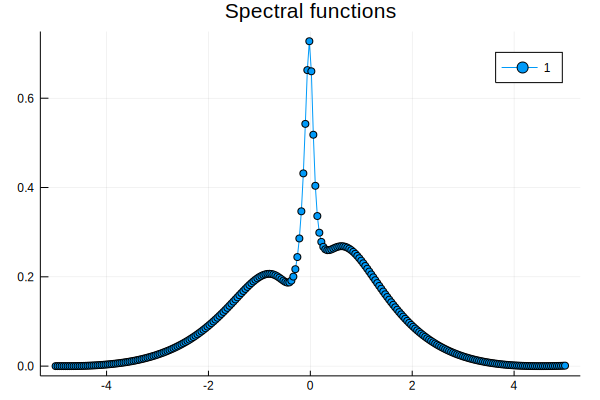

In [7]:
plot(omegas[:],xout[:,1]/dω,label="1",title="Spectral functions", marker=:circle)

We need more accurate Green's function. 

We symmetrize the Green's function to remove the real part of the $G(i \omega_n)$.

┌ Warning: omitting indices for non-singleton trailing dimensions is deprecated. Add `1` as trailing indices or use `reshape` to make the dimensionality of the array match the number of indices.
│   caller = top-level scope at none:0
└ @ Core none:0


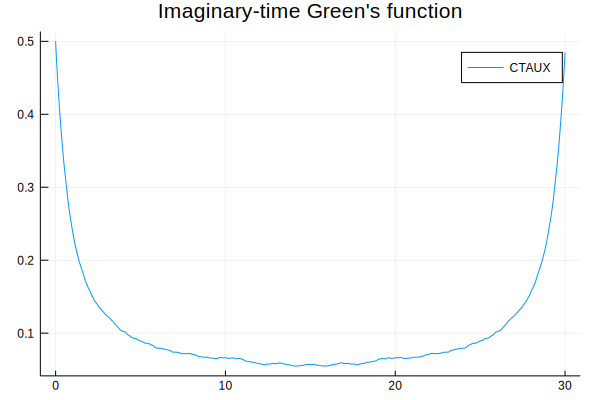

In [9]:
include("ctaux.jl")
using .Ctauxsolver
Gτ = symmetrize(Gω,τmesh,ωmesh,norbs,mfreq,ntime,β)
plot(τmesh[:],Gτ[:,1],label="CTAUX",title="Imaginary-time Green's function")

Making the matrix K...
done.
Doing SVD...
done.
---------------------------------------------
Singular values
1	

43.89031875003306
2	38.49375420947391
3	25.710235534593153
4	18.063773311695645
5	11.297535673262026
6	7.055998221685019
7	4.229597177225382
8	2.4895131883905277
9	1.4312473904007679
10	0.8070967345612838
11	0.4464774190571455
12	0.24257513573083875
13	0.1295083182812172
14	0.06798531284030253
15	0.03510520475235
16	0.017838048229154493
17	0.008921936062331708
18	0.0043938491989307755
19	0.0021309931780773158
20	0.0010180813549108792
21	0.00047917502433852195
22	0.00022223562286933664
23	0.00010157033012831948
24	4.5755204689495705e-5
25	2.0316230171649735e-5
26	8.89316104041818e-6
27	3.8377248362422e-6
28	1.6329600389301408e-6
29	6.850832339030068e-7
30	2.8343738864487165e-7
31	1.1563469342218396e-7
32	4.652849292866408e-8
33	1.8463370011439537e-8
34	7.226883569269969e-9
35	2.7899171262250914e-9
36	1.0624897084773616e-9
37	3.991114788373498e-10
38	1.4791049324432388e-10
39	5.4072350818327983e-11
---------------------------------------------

orbital: 1
1/18	λ:2.335721469090121e-6		Err

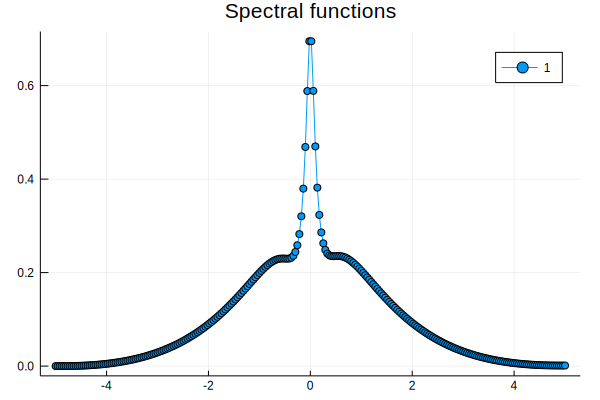

In [10]:
include("./smac.jl")
using .Smac
omegamax = 5.0
M = ntime
N = 256
vec_Gout = zeros(Float64,M,1)
xout = zeros(Float64,N,1)

omegas = zeros(Float64,N)
dω = 2omegamax/(N-1)
for i in 1:N
    omegas[i] = (i-1)*dω - omegamax
end


@time (xout,vec_Gout) = Smac.smac_main!(M,N,1,omegamax,β,Gτ)

plot(omegas[:],xout[:,1]/dω,label="1",title="Spectral functions", marker=:circle)